In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def forward_propagate(X, w, b):
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    return A

In [4]:
def backward_propagate(w, b, X, Y, A, m, n0, n1, learning_rate):
    dz = n0/n1 * (Y - Y * A) + A - Y * A
    dw = 1/m * np.dot(X, dz.T)
    db = 1/m * np.sum(dz)
    return dw, db

In [5]:
def initiate_params(n, m):
    w = np.zeros((n, 1))
    b = np.zeros((1, 1))
    return w, b

In [6]:
def logistic_regression(X, Y, learning_rate=0.1, num_iterations=10000):
    n, m = X.shape
    n0 = np.count_nonzero(Y == 0)
    n1 = np.count_nonzero(Y != 10)
    w, b = initiate_params(n, m)
    
    costs = []
    for i in range(num_iterations):
        A = forward_propagate(X, w, b)
        dw, db = backward_propagate(w, b, X, Y, A, m, n0, n1, learning_rate)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        L = - n0/n1 * (Y * A + (1-Y) * np.log(1-A)) # loss
        cost = 1/m * np.sum(L)
        if i % 50 == 0:
            costs.append(cost)
    return w, b, costs

In [7]:
def load_data():
    df = pd.read_excel('output.xlsx')
    df = df.dropna()
    soil_df = df[['plowing', 'other_basic_cultivation']]
    erosion_df = df[['raindrop_erosion']]
    X_train, X_test, y_train, y_test = train_test_split(soil_df, erosion_df, test_size=0.33)
    
    return X_train.transpose().to_numpy(), X_test.transpose().to_numpy(), y_train.transpose().to_numpy(), y_test.transpose().to_numpy()
X_train, X_test, y_train, y_test = load_data()

In [8]:
w, b, costs = logistic_regression(X_train, y_train, 0.01, 500)

In [9]:
def predict(X, w, b):
    A_predicted = forward_propagate(X, w, b)
    return A_predicted

In [10]:
predict(X_train, w, b)

array([[0.05643988, 0.05643988, 0.02841334, 0.05643988, 0.08471967,
        0.05643988, 0.05643988, 0.08471967, 0.15918627, 0.08471967,
        0.08471967, 0.05643988, 0.05643988, 0.02841334, 0.15918627,
        0.08471967, 0.08471967, 0.05643988, 0.02841334, 0.08471967,
        0.02841334, 0.05643988, 0.02841334, 0.02841334, 0.05643988,
        0.05643988, 0.08471967, 0.08471967, 0.15918627, 0.15918627,
        0.08471967, 0.05643988, 0.15918627, 0.15918627, 0.02841334,
        0.08471967, 0.15918627, 0.05643988, 0.05643988, 0.05643988,
        0.15918627, 0.05643988, 0.08471967, 0.02841334, 0.02841334,
        0.02841334, 0.05643988, 0.05643988, 0.05643988, 0.08471967,
        0.05643988, 0.02841334, 0.15918627, 0.05643988, 0.05643988,
        0.05643988, 0.05643988, 0.02841334, 0.15918627, 0.08471967,
        0.05643988, 0.15918627, 0.05643988, 0.05643988, 0.05643988,
        0.02841334, 0.02841334, 0.15918627, 0.08471967, 0.02841334,
        0.15918627, 0.02841334, 0.05643988, 0.05

In [11]:
from sklearn.linear_model import LogisticRegression as LR

In [12]:
df = pd.read_excel('output.xlsx')
df = df.dropna()
soil_df = df[['plowing']]
erosion_df = df[['raindrop_erosion']]
X_train, X_test, y_train, y_test = train_test_split(soil_df, erosion_df, test_size=0.33)

lr = LR(class_weight="balanced")
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
lr.score(X_train, y_train)

/home/omars/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7

In [13]:
import matplotlib.pyplot as plt

In [14]:
costs

[0.24945862338113478,
 0.19556889281439435,
 0.15582190549323846,
 0.12615064749976243,
 0.10359290389198034,
 0.08610388362495225,
 0.07229345115200549,
 0.061210159613583205,
 0.05219137528971762,
 0.044765648764615175]

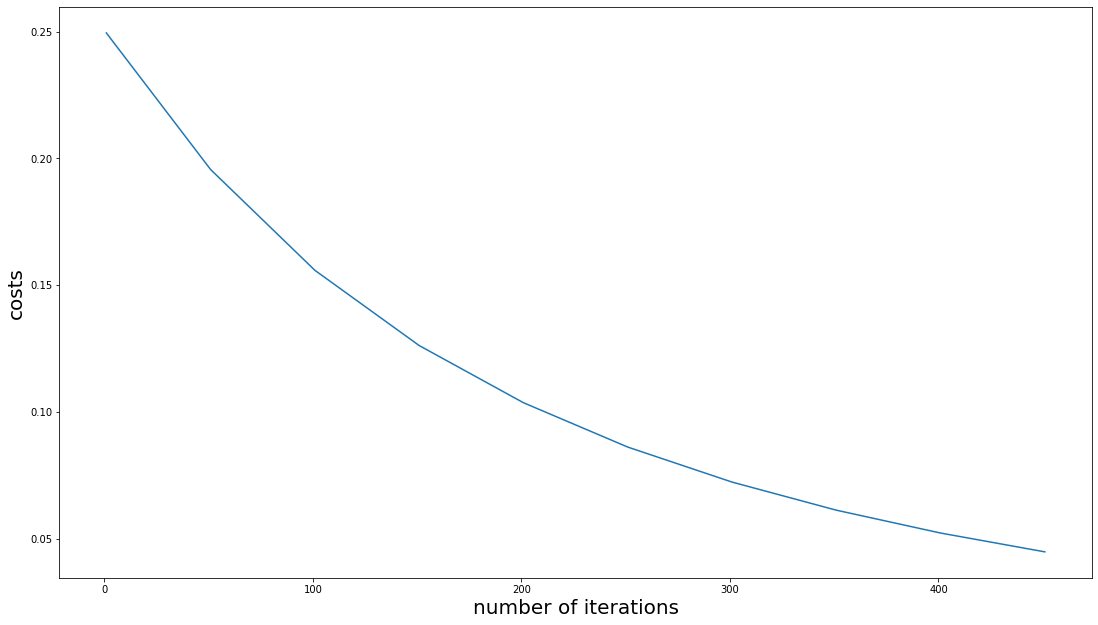

In [15]:
iters = [50 * i + 1 for i in range(len(costs))]
plt.plot(iters, costs)
plt.xlabel('number of iterations', fontsize=20)
plt.ylabel('costs', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [16]:
count = 0
for i in y_train.reset_index()['raindrop_erosion']:
    if i == 1:
        count += 1
count
len(y_train.reset_index()['raindrop_erosion']) - count

52

In [17]:
y_train['x'] = [1 for i in range(len(y_train.index.values))]

<ipython-input-17-3cd4f88c74d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['x'] = [1 for i in range(len(y_train.index.values))]


In [18]:
y_train['xpr'] = y_train['raindrop_erosion'] or y_train['x']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std


df = pd.read_excel('output.xlsx')
df = df.dropna()
soil_df = df[['plowing', 'grassing', 'crop_rotation']\
+ [e for e in df.columns if e.isnumeric() and int(str(e)[4:6]) in [12, 11, 10, 9]]]

def erosion_analyzer(erosion_field, k=15):
    erosion_df = df[[erosion_field]]
    
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    model = LogisticRegression(class_weight="balanced")
    scores = cross_val_score(model, soil_df, erosion_df, scoring='accuracy', cv=cv, n_jobs=-1)

    return mean(scores)

erosion_columns = [e for e in df.columns if 'erosion' in e]
erosion_scores = pd.DataFrame()
for erosion_field in erosion_columns:
    accuracy = erosion_analyzer(erosion_field, 100)
    data = {'Erosion Type': erosion_field, 'Accuracy': accuracy}
    erosion_scores = erosion_scores.append(data, ignore_index=True)


In [34]:
df = pd.read_excel('output.xlsx')
df = df.dropna()
erosion_fields = [e for e in df.columns if 'erosion' in e]
erosion_df = df[erosion_fields]
erosion_df


,raindrop_erosion,rill_erosion,gully_erosion,sedimentation_erosion,other_erosion
1,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
125,0.0,0.0,0.0,0.0,0.0
126,1.0,1.0,0.0,0.0,0.0
127,0.0,0.0,0.0,0.0,0.0
128,1.0,1.0,0.0,0.0,0.0


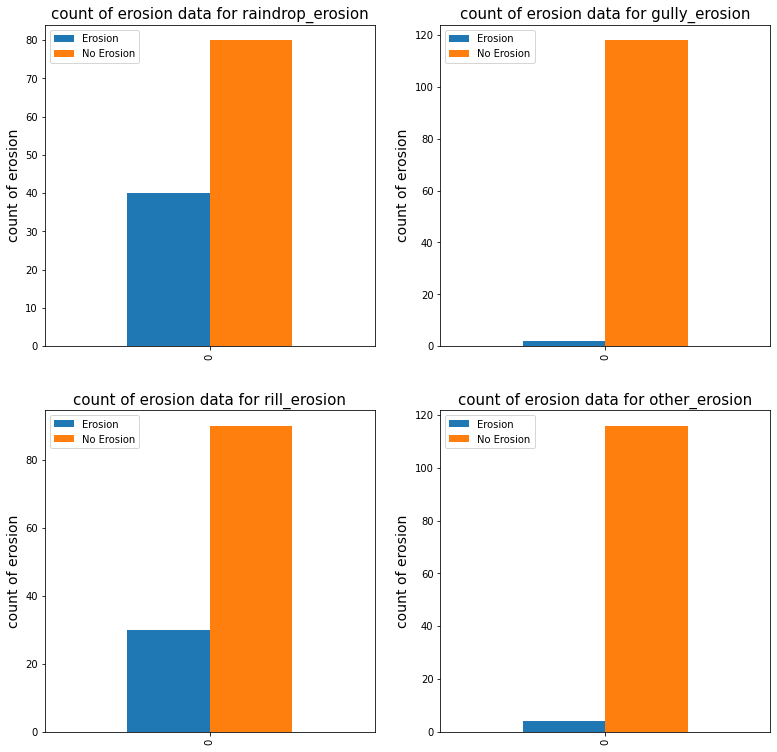

In [64]:
def get_erosion_count(erosion_df, field):
    def count_1(series):
        return sum([i for i in series if i == 1])
    series = erosion_df[field]
    count_of_1 = count_1(series)
    return {"Erosion": count_of_1, "No Erosion": len(series) - count_of_1}

fig, axs = plt.subplots(figsize=(13,13),nrows=2, ncols=2)

for i, er in enumerate([e for e in erosion_fields if e != 'sedimentation_erosion']):
    erosion_count = get_erosion_count(erosion_df, er)
    erosion = pd.DataFrame(erosion_count, index=[0])
    if i == 0:
        ax = erosion.plot(kind="bar", ax=axs[0, 0])
  
    elif i == 1:
        ax = erosion.plot(kind="bar", ax=axs[1, 0], title="count of erosion data for {}".format(er), ylabel="count of erosion")
    elif i == 2:
        ax = erosion.plot(kind="bar", ax=axs[0, 1], title="count of erosion data for {}".format(er), ylabel="count of erosion")
    else:
        ax = erosion.plot(kind="bar", ax=axs[1, 1], title="count of erosion data for {}".format(er), ylabel="count of erosion")
    
    ax.set_title("count of erosion data for {}".format(er), fontsize=15)
    ax.set_ylabel("count of erosion", fontsize=14)




erosion_scores = pd.DataFrame()
for erosion_field in erosion_columns:
    accuracy, std = erosion_analyzer(erosion_field, 100)
    data = {'Erosion Type': erosion_field, 'Accuracy': accuracy, 'Standard Deviation': std}
    erosion_scores = erosion_scores.append(data, ignore_index=True)

In [ ]:
erosion_scores.set_index('Erosion Type').to_excel('erosion_accuracy.xlsx')

In [ ]:
erosion_scores

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
int('09') in [9]